### EDA (Exploratory Data Analysis)

#### Install necessay Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly as py
import cufflinks as cf

In [5]:
# To make plotly and cufflinks work offline mode
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [6]:
# Load the data
world_cups = pd.read_csv('world_cup_cl.csv')
matches = pd.read_csv('matches_cl.csv')
players = pd.read_csv('players_cl.csv')

Let's check the cleaned datasets

In [13]:
print("Shape of the datasets are: ", world_cups.shape, matches.shape, players.shape)

Shape of the datasets are:  (850, 21) (20, 11) (37784, 8)


Question_1. Which country won the most?

In [14]:
# Who won during those tournaments 
winner = matches['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
Spain        1
England      1
France       1
Name: Winner, dtype: int64

In [15]:
# Who were in the second position
second = matches['Runners-Up'].value_counts()
second

Germany           4
Netherlands       3
Argentina         3
Hungary           2
Czechoslovakia    2
Italy             2
Brazil            2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [16]:
# Who were in the third position
third = matches['Third'].value_counts()
third

Germany        4
Sweden         2
France         2
Brazil         2
Poland         2
Turkey         1
Netherlands    1
Croatia        1
Portugal       1
Chile          1
USA            1
Italy          1
Austria        1
Name: Third, dtype: int64

In [17]:
# Add up the above three series   
teams = pd.concat([winner, second, third], axis = 1)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Germany,4.0,4.0,4.0
Italy,4.0,2.0,1.0
Argentina,2.0,3.0,NaN
Uruguay,2.0,NaN,NaN
Spain,1.0,NaN,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Netherlands,NaN,3.0,1.0
Hungary,NaN,2.0,NaN


In [19]:
# Add up the above three series   
teams = pd.concat([winner, second, third], axis = 1)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Germany,4.0,4.0,4.0
Italy,4.0,2.0,1.0
Argentina,2.0,3.0,NaN
Uruguay,2.0,NaN,NaN
Spain,1.0,NaN,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Netherlands,NaN,3.0,1.0
Hungary,NaN,2.0,NaN


In [20]:
# To make the columns name consistence and self explanatory let's change the 2nd name to second 
teams.columns = ['winner', 'second','third']
teams.columns

Index(['winner', 'second', 'third'], dtype='object')

In [21]:
# As we can see our teams dataset has given null values in each column for countries which doesn't have a datapoint. So, we have to fill those null values with 0 and chnage the datatype of the columns to integer from float
teams.fillna(0, inplace = True)
teams = teams.astype(int)
teams

,winner,second,third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
Spain,1,0,0
England,1,0,0
France,1,1,2
Netherlands,0,3,1
Hungary,0,2,0


In [22]:
teams.iplot(kind = 'bar', xTitle = 'Teams', yTitle = 'Count', title = 'Winners Rank')

Question 2. How many number of goals per country

In [23]:
home = world_cups[['Home Team Name', 'Home Team Goals']]
away = world_cups[['Away Team Name', 'Away Team Goals']]

In [24]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [25]:
goals = home.append(away, ignore_index=True)
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12
Angola,1
Argentina,133
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [26]:
goals = goals.sort_values(by = 'Goals', ascending = False)
goals

,Goals
Countries,
Germany,231
Brazil,225
Argentina,133
Italy,128
France,108
...,...
Dutch East Indies,0
China PR,0
Trinidad and Tobago,0


In [27]:
goals[:20].iplot(kind = 'bar', xTitle = 'Country Names', yTitle = "Goals", title = 'Countries hits most number of goals')

Question 3. Which matches has highest number of attendance

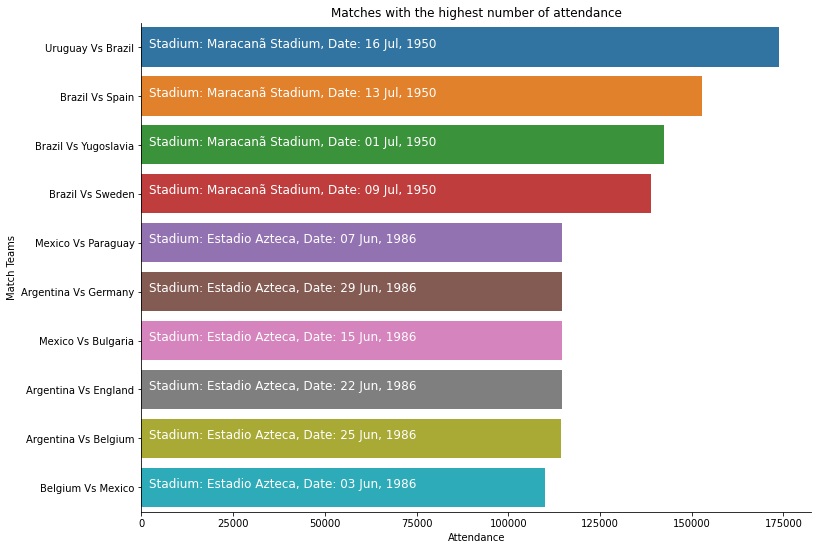

In [35]:
top_ten = world_cups.sort_values(by = 'Attendance', ascending = False)[:10]
top_ten['Vs'] = top_ten['Home Team Name'] + " Vs " + top_ten["Away Team Name"]

plt.figure(figsize = (12,9))

ax = sns.barplot(y = top_ten['Vs'], x = top_ten['Attendance'])

sns.despine(right = True) # To remove the left line

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of attendance')

for i, s in enumerate("Stadium: " + top_ten['Stadium'] + ", Date: " + top_ten['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()